In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [23]:
#Check for null or missing values
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [24]:
x = df.drop("Outcome" , axis = 1 )

y = df['Outcome']

<Axes: xlabel='Outcome', ylabel='count'>

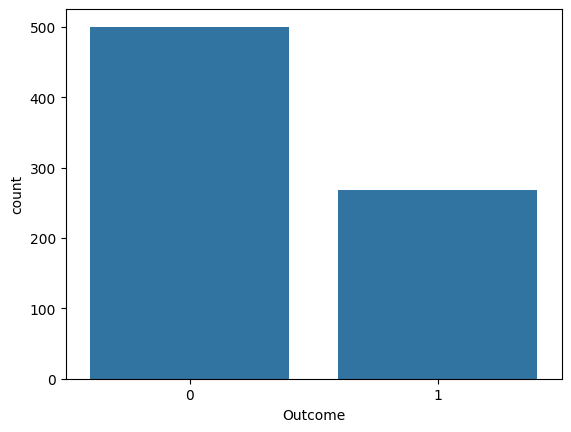

In [25]:
sns.countplot(x=y)

In [26]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [27]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [28]:
# split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.25, random_state=0)

In [29]:
x_scaled


array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [30]:
X_train.shape

(576, 8)

In [31]:
X_test.shape

(192, 8)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [33]:
error = []

for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))

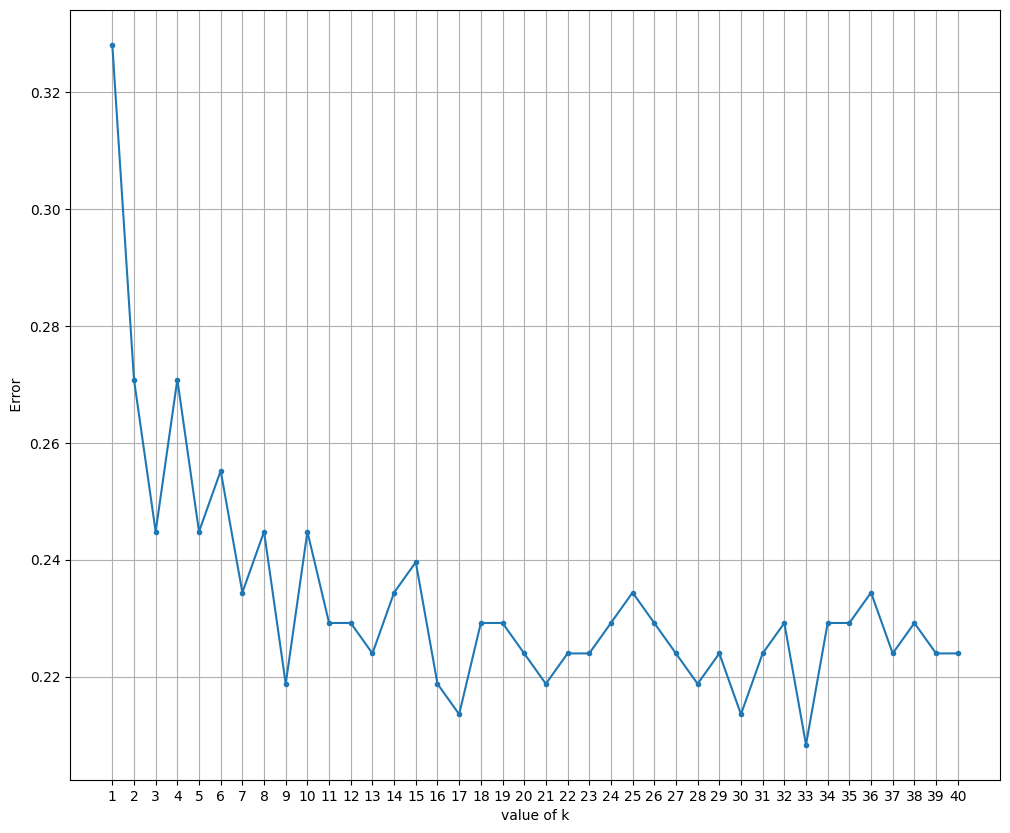

In [34]:
plt.figure(figsize=(12,10))
plt.xlabel("value of k")
plt.ylabel(" Error ")
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41), error, marker='.')

In [35]:
# least error for k value = 33 

knn = KNeighborsClassifier(n_neighbors= 33)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [36]:
#  Compute evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Error Rate
error_rate = 1 - accuracy
print("\nError Rate:", error_rate)

# Precision
precision = precision_score(y_test, y_pred)
print("\nPrecision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("\nRecall:", recall)


Confusion Matrix:
 [[122   8]
 [ 32  30]]

Accuracy: 0.7916666666666666

Error Rate: 0.20833333333333337

Precision: 0.7894736842105263

Recall: 0.4838709677419355


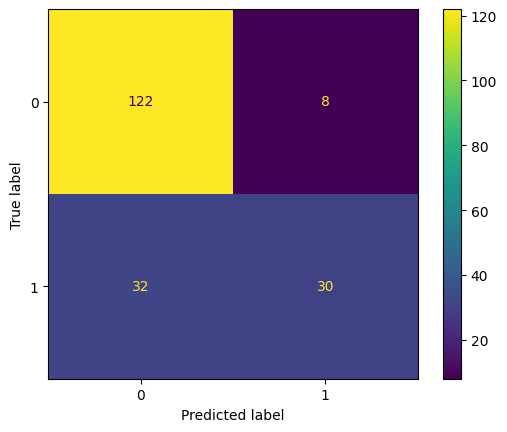

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192

